# Alternative Philips curve

This project explores the use of the consumer price index for beer as a substitute for inflation in depicting the traditional Philips curve, where the traditional Philips curve posits that higher inflation leads to lower unemployment rates and vice versa. 

**Imports**

In [1127]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

**We import our data from Statistics Denmark (consumer price index and gross unemployment rate):**

In [1128]:
CPI = DstApi('PRIS111') 
GUR = DstApi('AUS07') 

**A quick overview of the available data:**

In [1129]:
tabsum1 = CPI.tablesummary(language='en')
# display(tabsum1)
tabsum2 = GUR.tablesummary(language='en')
# display(tabsum2)

Table PRIS111: Consumer price index by commodity group, unit and time
Last update: 2023-05-10T08:00:00
Table AUS07: Unemployed persons (seasonally adjusted) by benefits, sex and age, seasonal adjustment and actual figures and time
Last update: 2023-04-28T08:00:00


In [1130]:
# We look at the available values for a each variable in data from CPI by the following code.
for variable in tabsum1['variable name']:
    print(variable+':')
    display(CPI.variable_levels(variable, language='en'))

VAREGR:


,id,text
0,000000,"00 Consumer price index, total"
1,010000,01 Food and non-alcoholic beverages
2,011000,01.1 Food
3,011100,01.1.1 Bread and cereals
4,011110,01.1.1.1 Rice
...,...,...
379,127030,12.7.0.3 Funeral services
380,131000,13.1 Goods (total)
381,132000,13.2 Services (total)
382,141000,14.1 Overall Consumer Price Index - excl. ener...


ENHED:


,id,text
0,100,Index
1,200,Percentage change compared to previous month (...
2,300,Percentage change compared to same month the y...


Tid:


,id,text
0,2001M01,2001M01
1,2001M02,2001M02
2,2001M03,2001M03
3,2001M04,2001M04
4,2001M05,2001M05
...,...,...
263,2022M12,2022M12
264,2023M01,2023M01
265,2023M02,2023M02
266,2023M03,2023M03


In [1131]:
# We look at the available values for a each variable in data from GUR: 
for variable in tabsum2['variable name']:
    print(variable+':')
    display(GUR.variable_levels(variable, language='en'))

YD:


,id,text
0,TOT,Gross unemployment
1,NET,Net unemployment
2,LDP,Net unemployed recipients of unemployment bene...
3,LKT,Net unemployed recipients of social assistance
4,AKI,Activation total
5,ADP,Activation of persons on unemployment benefits
6,AKT,Activation of persons on social assistance (pr...
7,MEN,Men
8,KVR,Women
9,U25,16-24 years


SAESONFAK:


,id,text
0,9,Seasonally adjusted figures in percent of the ...
1,10,Seasonally adjusted
2,22,Enumerated actual figures in percent of the l...
3,24,Enumerated actual figures


Tid:


,id,text
0,2007M01,2007M01
1,2007M02,2007M02
2,2007M03,2007M03
3,2007M04,2007M04
4,2007M05,2007M05
...,...,...
190,2022M11,2022M11
191,2022M12,2022M12
192,2023M01,2023M01
193,2023M02,2023M02


**Define a param dictionary detailing the data we want**

In [1132]:
# The _define_base_params -method gives us a nice template (selects all available data) for CPI data
paramsC = CPI._define_base_params(language='en')
paramsC

{'table': 'pris111',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VAREGR', 'values': ['*']},
  {'code': 'ENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [1133]:
# The _define_base_params -method gives us a nice template (selects all available data) for GUR data
paramsG = GUR._define_base_params(language='en')
paramsG

{'table': 'aus07',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'YD', 'values': ['*']},
  {'code': 'SAESONFAK', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

**We edit the above, such that we get the specific data we want from the CPI and GUR data**

In this case we want to select data for the consumer price index in total and for beer from Pris111 and the uemployment rate for men, women and total from AUS07.

In [1134]:
params1 = {'table': 'pris111',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VAREGR', 'values': ["000000",'021300']},
  {'code': 'ENHED', 'values': ['300']},
  {'code': 'Tid', 'values': ['>=2007M01<=2023M02']}]}

In [1135]:
params2 = {'table': 'aus07',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'YD', 'values': ['TOT','MEN','KVR']},
  {'code': 'SAESONFAK', 'values': ['9']},
  {'code': 'Tid', 'values': ['*']}]}

In [1136]:
CPI_api = CPI.get_data(params=params1)
CPI_api.head(5)

,VAREGR,ENHED,TID,INDHOLD
0,"00 Consumer price index, total",Percentage change compared to same month the y...,2007M03,2.0
1,02.1.3 Beer,Percentage change compared to same month the y...,2007M03,1.9
2,"00 Consumer price index, total",Percentage change compared to same month the y...,2021M06,1.7
3,02.1.3 Beer,Percentage change compared to same month the y...,2021M06,-1.7
4,"00 Consumer price index, total",Percentage change compared to same month the y...,2008M10,3.7


In [1137]:
GUR_api = GUR.get_data(params=params2)
GUR_api.head(5)

,YD,SAESONFAK,TID,INDHOLD
0,Women,Seasonally adjusted figures in percent of the ...,2010M12,5.4
1,Men,Seasonally adjusted figures in percent of the ...,2010M12,6.8
2,Gross unemployment,Seasonally adjusted figures in percent of the ...,2010M12,6.1
3,Women,Seasonally adjusted figures in percent of the ...,2007M06,4.4
4,Men,Seasonally adjusted figures in percent of the ...,2007M06,2.9


**We merge the data:**

In [1138]:
# We merge our selected dataframes using an outer join,based on the time (TID) column, such that the dataframes are matched.
beer = pd.merge(CPI_api, GUR_api, on='TID', how='outer')
beer.head(5)

,VAREGR,ENHED,TID,INDHOLD_x,YD,SAESONFAK,INDHOLD_y
0,"00 Consumer price index, total",Percentage change compared to same month the y...,2007M03,2.0,Women,Seasonally adjusted figures in percent of the ...,4.9
1,"00 Consumer price index, total",Percentage change compared to same month the y...,2007M03,2.0,Men,Seasonally adjusted figures in percent of the ...,3.1
2,"00 Consumer price index, total",Percentage change compared to same month the y...,2007M03,2.0,Gross unemployment,Seasonally adjusted figures in percent of the ...,3.9
3,02.1.3 Beer,Percentage change compared to same month the y...,2007M03,1.9,Women,Seasonally adjusted figures in percent of the ...,4.9
4,02.1.3 Beer,Percentage change compared to same month the y...,2007M03,1.9,Men,Seasonally adjusted figures in percent of the ...,3.1


**We find the mean value of the unemployment rates:**

In [1139]:
#We convert "INDHOLD_y" to numeric values:
beer['INDHOLD_y'] = pd.to_numeric(beer['INDHOLD_y'], errors='coerce')
#We find the mean of unemployment rate conditioned on men:
mean_men = beer[beer['YD'] == 'Men']['INDHOLD_y'].mean()
mean_men_rounded = round(mean_men, 2)
print("Mean unemployment rate for men:", mean_men_rounded)
#We find the mean of unemployment rate conditioned on women:
mean_women = beer[beer['YD'] == 'Women']['INDHOLD_y'].mean()
mean_women_rounded = round(mean_women, 2)
print("Mean unemployment rate for women:", mean_women_rounded)
#We find the mean of unemployment rate conditioned on total:
mean_GUR = beer[beer['YD'] == 'Gross unemployment']['INDHOLD_y'].mean()
mean_GUR_rounded = round(mean_GUR, 2)
print("Mean unemployment rate for total:", mean_GUR_rounded)

Mean unemployment rate for men: 4.38
Mean unemployment rate for women: 4.47
Mean unemployment rate for total: 4.42


We find that the mean unemployment rate for women is higher than for men.

**Plot for gross unemployment rate and consumer price index for beer:**

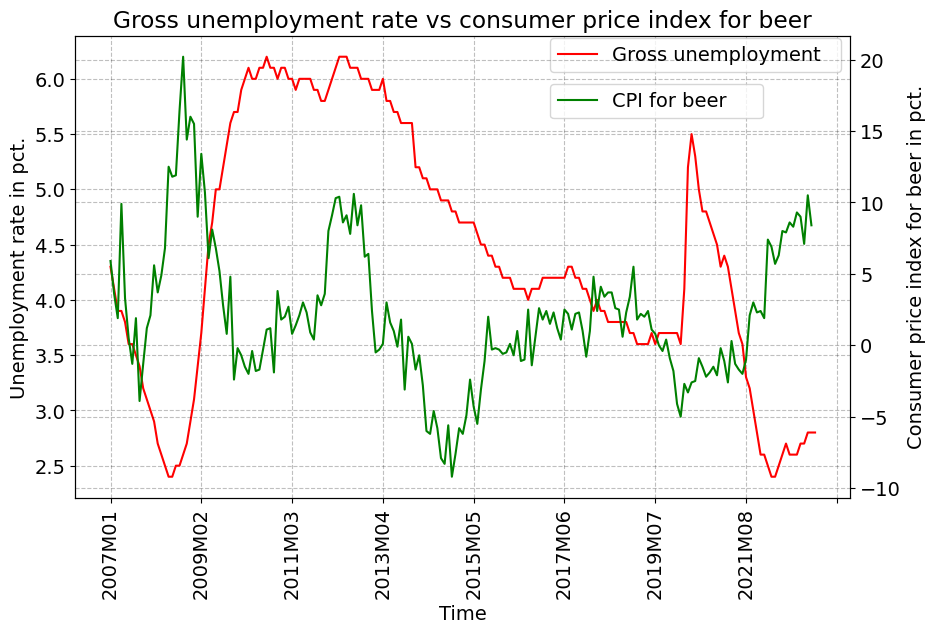

In [1140]:
# Define the categories for unemployment and consumer price index
Unemployment = ["Gross unemployment"] 
Consumer_price_index = ["00 Consumer price index, total","02.1.3 Beer"]

# Convert the 'INDHOLD_y' and 'INDHOLD_x' columns to numeric format
beer['INDHOLD_y'] = pd.to_numeric(beer['INDHOLD_y'], errors='coerce')
beer['INDHOLD_x'] = pd.to_numeric(beer['INDHOLD_x'], errors='coerce')

# Group the data and calculate the mean to create the 'beer_y' DataFrame
beer_y = beer.groupby(['YD', 'TID'])['INDHOLD_y'].mean().unstack()

# Group the data and calculate the mean to create the 'beer_x' DataFrame
beer_x = beer.groupby(['VAREGR', 'TID'])['INDHOLD_x'].mean().unstack()

# Create the figure and subplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Plot the 'Gross unemployment' data on the primary y-axis
beer_y.loc[Unemployment[0]].plot(ax=ax, label=Unemployment[0], color="red")

# Add legend to the primary y-axis
ax.legend(frameon=True, bbox_to_anchor=(0.6, 0.9, 0.4, 0.2), loc="lower left", mode="expand")

# Set labels and rotation for the axes
ax.set_ylabel('Unemployment rate in pct.')
ax.set_xlabel('Time')
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

# Create the secondary y-axis
ax2 = ax.twinx()

# Plot the 'CPI for beer' data on the secondary y-axis
beer_x.loc[Consumer_price_index[1]].plot(ax=ax2, label='CPI for beer', color='green')

# Add legend to the secondary y-axis
ax2.legend(frameon=True, bbox_to_anchor=(0.6, 0.8, 0.3, 0.2), loc="lower right", mode="expand")

# Set label for the secondary y-axis
ax2.set_ylabel('Consumer price index for beer in pct.')

# Set the title of the plot
ax.set_title('Gross unemployment rate vs consumer price index for beer')

# Display the plot
plt.show()



**Correlation between consumer price index for beer and unemployment rate:**

In [1141]:
# Convert "INDHOLD_x" to numeric values
beer['INDHOLD_x'] = pd.to_numeric(beer['INDHOLD_x'], errors='coerce')
#We convert "INDHOLD_y" to numeric values:
beer['INDHOLD_y'] = pd.to_numeric(beer['INDHOLD_y'], errors='coerce')

# Filter the data for "Gross unemployment" in "YD" column
CPI_total = beer[beer['YD'] == 'Gross unemployment']['INDHOLD_y']

# Filter the data for "Consumer price index for beer" in "VAREGR" column
GU_rate = beer[beer['VAREGR'] == '02.1.3 Beer']['INDHOLD_x']

# Drop any rows with missing values in CPI_total and GU_rate
CPI_total = CPI_total.dropna()
GU_rate = GU_rate.dropna()

# Calculate the correlation between unemployment rate and consumer price index for men
correlation = CPI_total.corr(GU_rate)

# Round the correlation coefficient to 2 decimals
correlation = round(correlation, 2)

# Print the correlation coefficient
print("Correlation between gross unemployment rate and consumer price index for beer: ", correlation)

Correlation between gross unemployment rate and consumer price index for beer:  -0.3


**Plot for gross unemployment rate and consumer price index total (inflation rate):**

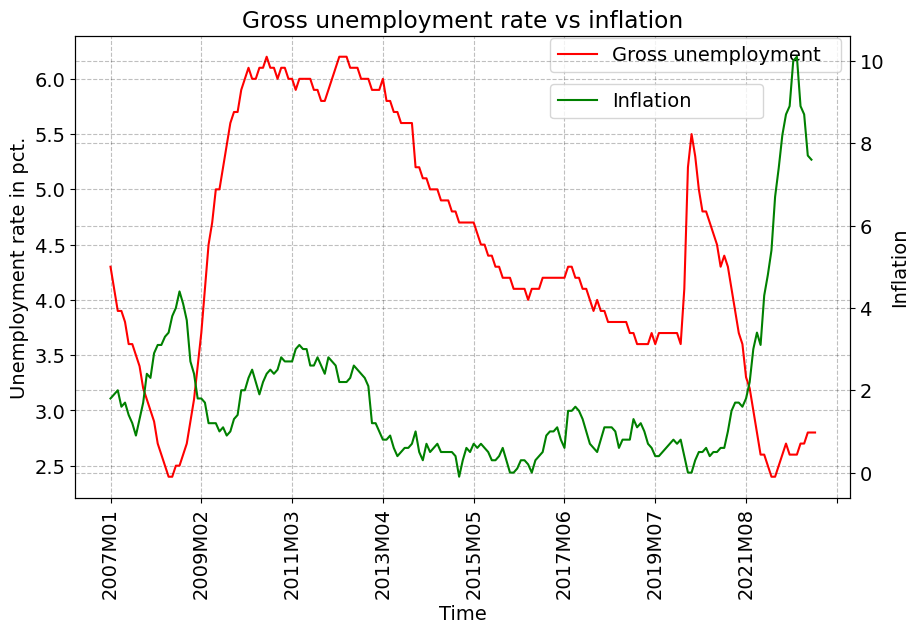

In [1142]:
# Define the categories for unemployment and consumer price index
Unemployment = ["Gross unemployment"] 
Consumer_price_index = ["00 Consumer price index, total","02.1.3 Beer"]

# Convert the 'INDHOLD_y' and 'INDHOLD_x' columns to numeric format
beer['INDHOLD_y'] = pd.to_numeric(beer['INDHOLD_y'], errors='coerce')
beer['INDHOLD_x'] = pd.to_numeric(beer['INDHOLD_x'], errors='coerce')

# Group the data and calculate the mean to create the 'beer_y' DataFrame
beer_y = beer.groupby(['YD', 'TID'])['INDHOLD_y'].mean().unstack()

# Group the data and calculate the mean to create the 'beer_x' DataFrame
beer_x = beer.groupby(['VAREGR', 'TID'])['INDHOLD_x'].mean().unstack()

# Create the figure and subplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Plot the 'Gross unemployment' data on the primary y-axis
beer_y.loc[Unemployment[0]].plot(ax=ax, label=Unemployment[0], color="red")

# Add legend to the primary y-axis
ax.legend(frameon=True, bbox_to_anchor=(0.6, 0.9, 0.4, 0.2), loc="lower left", mode="expand")

# Set labels and rotation for the axes
ax.set_ylabel('Unemployment rate in pct.')
ax.set_xlabel('Time')
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

# Create the secondary y-axis
ax2 = ax.twinx()

# Plot the 'inflation' data on the secondary y-axis
beer_x.loc[Consumer_price_index[0]].plot(ax=ax2, label='Inflation', color='green')

# Add legend to the secondary y-axis
ax2.legend(frameon=True, bbox_to_anchor=(0.6, 0.8, 0.3, 0.2), loc="lower right", mode="expand")

# Set label for the secondary y-axis
ax2.set_ylabel('Inflation')

# Set the title of the plot
ax.set_title('Gross unemployment rate vs inflation')

# Display the plot
plt.show()


**Correlation between inflation rate and unemployment rate:**

In [1143]:
# Convert "INDHOLD_x" to numeric values
beer['INDHOLD_x'] = pd.to_numeric(beer['INDHOLD_x'], errors='coerce')
#We convert "INDHOLD_y" to numeric values:
beer['INDHOLD_y'] = pd.to_numeric(beer['INDHOLD_y'], errors='coerce')

# Filter the data for "Gross unemployment" in "TID" column
CPI_total = beer[beer['YD'] == 'Gross unemployment']['INDHOLD_y']

# Filter the data for "Consumer price index, total" in "TID" column
GU_rate = beer[beer['VAREGR'] == '00 Consumer price index, total']['INDHOLD_x']

# Drop any rows with missing values in CPI_total and GU_rate
CPI_total = CPI_total.dropna()
GU_rate = GU_rate.dropna()

# Calculate the correlation between unemployment rate and consumer price index for men
correlation = CPI_total.corr(GU_rate)

# Round the correlation coefficient to 2 decimals
correlation = round(correlation, 2)

# Print the correlation coefficient
print("Correlation between gross unemployment rate and inflation rate: ", correlation)

Correlation between gross unemployment rate and inflation rate:  -0.38


**Our findings:**
\
We find that the negative correlation is stronger between the inflation and the gross unemployment rate, than for beer, which suggest that the price index for beer is a worse alternative to depict the traditional Philips curve.

We can analyze this further by plotting the relationship between the consumer price index for beer and the total consumer price index against the unemployment rate. Moreover, we have fitted a logarithmic function to the data points to illustrate this relationship which depicts the inverse relationship as described by the Phillips Curve. The figure below shows our results.


Fitted values for beer: (a, b, c) = (-6.69, 0.16, -0.46)
Fitted values for inflation: (a, b, c) = (-3.37, 0.08, -1.93)


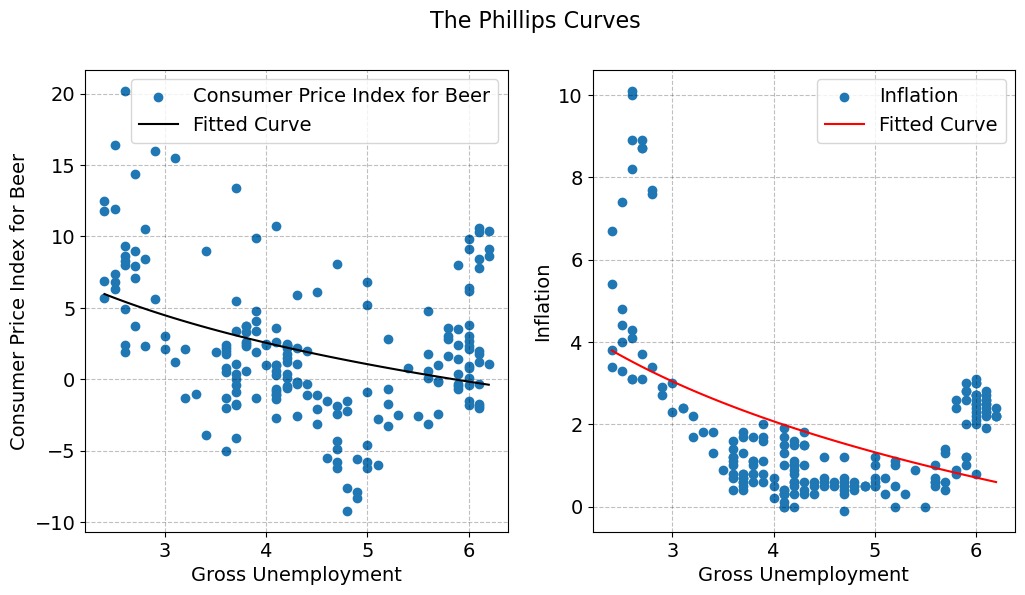

In [1145]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sample points of Unemployment rate (x) and Consumer Price Index for beer (y)
x = beer_y.loc[Unemployment[0]]
y_beer = beer_x.loc[Consumer_price_index[1]]
y_inf = beer_x.loc[Consumer_price_index[0]]

# Ensure x and y have the same length
min_length = min(len(x), len(y_beer), len(y_inf))
x = x[:min_length]
y_beer = y_beer[:min_length]
y_inf = y_inf[:min_length]

# Filter out invalid values
valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y_beer))
x = x[valid_indices]
y_beer = y_beer[valid_indices]

valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y_inf))
x = x[valid_indices]
y_inf = y_inf[valid_indices]

# Fit the function 'a * np.log(b * t) + c' to unemployment rate (x) and Consumer Price Index for beer (y)
p0 = [1, 0.1, 0]  # Initial values for a, b, and c
popt_beer, pcov_beer = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, x, y_beer, p0=p0, maxfev=2000)

# Save fitted values for beer
a_beer = popt_beer[0]
b_beer = popt_beer[1]
c_beer = popt_beer[2]

# Fit the function 'a * np.log(b * t) + c' to unemployment rate (x) and inflation (y)
popt_inf, pcov_inf = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, x, y_inf, p0=p0, maxfev=2000)

# Save fitted values for inflation
a_inf = popt_inf[0]
b_inf = popt_inf[1]
c_inf = popt_inf[2]

# Print values
print('Fitted values for beer: (a, b, c) = ({:.2f}, {:.2f}, {:.2f})'.format(a_beer, b_beer, c_beer))
print('Fitted values for inflation: (a, b, c) = ({:.2f}, {:.2f}, {:.2f})'.format(a_inf, b_inf, c_inf))

# Create the fitted curves
x_fitted = np.linspace(np.min(x), np.max(x), 100)
y_beer_fitted = a_beer * np.log(b_beer * x_fitted) + c_beer
y_inf_fitted = a_inf * np.log(b_inf * x_fitted) + c_inf

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot figure of unemployment rate against CPI for beer
ax1.scatter(x, y_beer, label='Consumer Price Index for Beer')
ax1.plot(x_fitted, y_beer_fitted, 'k', label='Fitted Curve')
ax1.set_ylabel('Consumer Price Index for Beer')
ax1.set_xlabel('Gross Unemployment')
ax1.legend()

# Plot figure of unemployment rate against inflation
ax2.scatter(x, y_inf, label='Inflation')
ax2.plot(x_fitted, y_inf_fitted, 'r', label='Fitted Curve')
ax2.set_ylabel('Inflation')
ax2.set_xlabel('Gross Unemployment')
ax2.legend()

# Set the title for the figure
fig.suptitle("The Phillips Curves", fontsize=16)

plt.show()

**Conclusion**

In comparison to the traditional Phillips Curves, we observe that the consumer price index for beer is a less effective alternative for capturing the negative correlation between the price index and unemployment.